In [1]:
import os
import ntpath
import numpy as np
from glob import glob
from docopt import docopt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
os.chdir('new_eval')

In [3]:
files = glob(os.path.join('*.dat.csv'))

In [4]:
files

['crf_model_conf.dat.csv',
 'qdist_new_conf.dat.csv',
 'rnnoie_new_conf.dat.csv',
 'srl_bert_no_science_new_conf.dat.csv',
 'srl_bert_oie2016_new_conf.dat.csv']

In [5]:
def get_pr(path):
    ''' get PR curve from file '''
    with open(path) as fin:
        # remove header line
        fin.readline()
        [p, r] = list(zip(*[[float(x) for x in line.strip().split('\t')] for line in fin]))
        return p, r

In [6]:
df = pd.read_csv('qdist_new_conf.dat.csv')
p = list(df['Precision'])
r = list(df['Recall'])
t = list(df['Threshold'])

In [7]:
p, r = get_pr('crf_model_conf.dat')
df1 = pd.DataFrame.from_items([('r', list(r)), ('ls_oie_crf', list(p))])
#df1['ls_oie_crf'] = np.NaN
df1['ls_oie'] = np.NaN
df1['rnnoie'] = np.NaN
df1['srl_bert_ls'] = np.NaN
df1['srl_bert_oie2016'] = np.NaN
df1['t'] = np.NaN
cols = ['r', 't', 'rnnoie', 'ls_oie', 'ls_oie_crf', 'srl_bert_oie2016', 'srl_bert_ls']
df1 = df1[cols]

p, r = get_pr('qdist_new_conf.dat')
df2 = pd.DataFrame.from_items([('r', list(r)), ('ls_oie', list(p))])
df2['ls_oie_crf'] = np.NaN
#df2['ls_oie'] = np.NaN
df2['rnnoie'] = np.NaN
df2['srl_bert_ls'] = np.NaN
df2['srl_bert_oie2016'] = np.NaN
df2['t'] = np.NaN
df2 = df2[cols]

p, r = get_pr('rnnoie_new_conf.dat')
df3 = pd.DataFrame.from_items([('r', list(r)), ('rnnoie', list(p))])
df3['ls_oie_crf'] = np.NaN
df3['ls_oie'] = np.NaN
#df3['rnnoie'] = np.NaN
df3['srl_bert_ls'] = np.NaN
df3['srl_bert_oie2016'] = np.NaN
df3['t'] = np.NaN

df3 = df3[cols]

p, r = get_pr('srl_bert_no_science_new_conf.dat')
df4 = pd.DataFrame.from_items([('r', list(r)), ('srl_bert_ls', list(p))])
df4['ls_oie_crf'] = np.NaN
df4['ls_oie'] = np.NaN
df4['rnnoie'] = np.NaN
#df4['srl_bert_ls'] = np.NaN
df4['srl_bert_oie2016'] = np.NaN
df4['t'] = np.NaN

df4 = df4[cols]

p, r = get_pr('srl_bert_oie2016_new_conf.dat')
df5 = pd.DataFrame.from_items([('r', list(r)), ('srl_bert_oie2016', list(p))])
df5['ls_oie_crf'] = np.NaN
df5['ls_oie'] = np.NaN
df5['rnnoie'] = np.NaN
df5['srl_bert_ls'] = np.NaN
df5['t'] = np.NaN

#df5['srl_bert_oie2016'] = np.NaN
df5 = df5[cols]

df = pd.read_csv('qdist_new_conf.dat.csv')
p = list(df['Precision'])
r = list(df['Recall'])
t = list(df['Threshold'])
df6 = pd.DataFrame.from_items([('r', r), ('t', t)])
df6['ls_oie_crf'] = np.NaN
df6['ls_oie'] = np.NaN
df6['rnnoie'] = np.NaN
df6['srl_bert_ls'] = np.NaN
df6['srl_bert_oie2016'] = np.NaN
#df5['t'] = np.NaN
df6 = df6[cols]



results = pd.concat([df1,df2,df3,df4,df5,df6]).sort_values(by = 'r')#.set_index('r')
results['extractions'] = 1
#results.loc[pd.isna(results['srl_bert_oie2016']), 'extractions'] = 0
results['cum_extractions'] = results['extractions'].cumsum()
results['cum_extractions_pct'] = results['cum_extractions']/len(results['cum_extractions'])

/Users/jacobsolawetz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  
/Users/jacobsolawetz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  del sys.path[0]
/Users/jacobsolawetz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
/Users/jacobsolawetz/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: from_items is deprecated. Please use DataFrame.from

Text(0,0.5,'Precision')

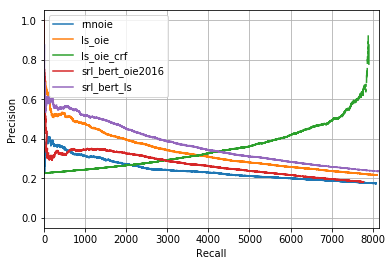

In [32]:
ax =results[['rnnoie', 'ls_oie', 'ls_oie_crf', 'srl_bert_oie2016', 'srl_bert_ls']] .plot()
ax.grid()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

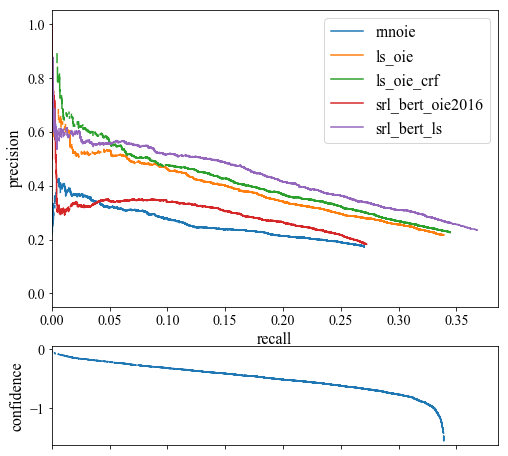

In [26]:
#import matplotlib
#matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'Times New Roman',
    'text.usetex': False,
    'pgf.rcfonts': False,
})
#import matplotlib.pyplot as plt




x = results['r'].to_numpy()
y1 = results['rnnoie'].to_numpy()
y2 = results['ls_oie'].to_numpy()
y3 = results['ls_oie_crf'].to_numpy()
y4 = results['srl_bert_oie2016'].to_numpy()
y5 = results['srl_bert_ls'].to_numpy()
y6 = results['cum_extractions_pct'].to_numpy()
y7 = results['t'].to_numpy()

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 8))
fig.subplots_adjust(hspace=.2)

axs[0].plot(x, y1, label = 'rnnoie')
axs[0].plot(x, y2, label = 'ls_oie')
axs[0].plot(x, y3, label = 'ls_oie_crf')
axs[0].plot(x, y4, label = 'srl_bert_oie2016')
axs[0].plot(x, y5, label = 'srl_bert_ls')
for tk in axs[0].get_xticklabels():
    tk.set_visible(True)

#axs[0].grid()
axs[0].legend(loc="upper right", prop={'size': 20})
leg = axs[0].legend()
leg.set_title("Supervised OIE Systems",prop={'size':14})
axs[0].legend(loc="upper right", prop={'size': 16})#.set_title("Supervised OIE Systems",prop={'size':14})

#for tick in axs[0].get_xticklabels():
    #tick.set_visible(True)
axs[0].xaxis.set_tick_params(labelbottom=True)
axs[0].tick_params(axis='both', which='major', labelsize=14)

axs[0].set_xlabel('recall', fontsize = 16)
axs[0].set_ylabel('precision', fontsize = 16)
axs[0].set_xlim(xmin=0)

#axs[1].plot(x, y6)

#for tick in axs[0].get_xticklabels():
    #tick.set_visible(True)
#axs[1].grid()
#axs[1].set_ylabel('Fraction of Extractions')
#axs[1].xaxis.set_tick_params(labelbottom=False)


axs[1].plot(x, y7)

#for tick in axs[0].get_xticklabels():
    #tick.set_visible(True)
#axs[1].grid()
axs[1].set_ylabel('confidence', fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].xaxis.set_tick_params(labelbottom=False)
axs[1].set_xlim(xmin=0)
#plt.savefig('example.pgf')

#plt.show()
plt.savefig('example.png', bbox_inches='tight')


In [12]:
!pip install xelatex

  Could not find a version that satisfies the requirement xelatex (from versions: )
No matching distribution found for xelatex
You are using pip version 18.0, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


<Figure size 432x288 with 0 Axes>

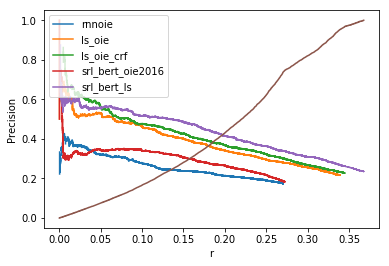

In [65]:
fig=plt.figure()
ax = results[['rnnoie', 'ls_oie', 'ls_oie_crf', 'srl_bert_oie2016', 'srl_bert_ls']].plot()
ax.grid()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax2 = results['cum_extractions_pct'].plot(sharex = ax)

In [66]:
results[['rnnoie', 'ls_oie', 'ls_oie_crf', 'srl_bert_oie2016', 'srl_bert_ls']].to_numpy()


AttributeError: 'DataFrame' object has no attribute 'to_numpy'

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt



In [81]:
results[['rnnoie', 'ls_oie', 'ls_oie_crf', 'srl_bert_oie2016', 'srl_bert_ls']].as_matrix()

array([[0.        ,        nan,        nan,        nan,        nan],
       [0.        ,        nan,        nan,        nan,        nan],
       [0.        ,        nan,        nan,        nan,        nan],
       ...,
       [       nan,        nan,        nan,        nan, 0.23543152],
       [       nan,        nan,        nan,        nan, 0.23586649],
       [       nan,        nan,        nan,        nan, 0.23509202]])

In [17]:
results.loc[pd.isna(results['srl_bert_oie2016']), 'extractions'] = 0

In [14]:
len(results)

40047

In [18]:
results[pd.isna(results['srl_bert_oie2016'])]['extractions']

0       0
2       0
3       0
0       0
1       0
1       0
4       0
1       0
0       0
0       0
2       0
1       0
5       0
6       0
7       0
8       0
2       0
3       0
5       0
2       0
3       0
12      0
11      0
10      0
9       0
4       0
4       0
15      0
14      0
13      0
       ..
8104    0
8130    0
8105    0
8106    0
8107    0
8108    0
8109    0
8110    0
8111    0
8112    0
8113    0
8114    0
8115    0
8131    0
8116    0
8118    0
8119    0
8120    0
8121    0
8122    0
8123    0
8124    0
8125    0
8126    0
8127    0
8128    0
8129    0
8117    0
8132    0
8149    0
Name: extractions, Length: 32263, dtype: int64

In [76]:
df['Recall'].values

array([3.39220580e-01, 3.39028604e-01, 3.39028604e-01, ...,
       3.83950854e-04, 1.91975427e-04, 1.91975427e-04])

In [13]:
matplotlib.matplotlib_fname()

'/Users/jacobsolawetz/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'